# Dataset de competição

## Fase 0: Imports e Leitura dos Dados

In [148]:
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re # Used in Data Processing
from sklearn import preprocessing

# Definir o número máximo de colunas do pandas para 21
pd.set_option('display.max_columns', 21)

The following configuration was implemented to avoid pandas from considering that the 'None' value in the column 'Injeçao na rede (kWh)' is NaN.

In [149]:
allowed_nans = ['', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN',
                '-NaN', '-nan', '1.#IND', '1.#QNAN', '<NA>', 'N/A', 'NA',
                'NULL', 'NaN', 'n/a', 'nan', 'null']

treino = pd.read_csv('datasets/treino.csv', na_values=allowed_nans, keep_default_na=False)

## Fase 1: Exploração Simples dos Dados

In [150]:
treino.shape

(11688, 21)

In [151]:
treino.columns

Index(['Data', 'Hora', 'Normal (kWh)', 'Horario Economico (kWh)',
       'Autoconsumo (kWh)', 'Injeçao na rede (kWh)', 'dt', 'dt_iso',
       'city_name', 'temp', 'feels_like', 'temp_min', 'temp_max', 'pressure',
       'sea_level', 'grnd_level', 'humidity', 'wind_speed', 'rain_1h',
       'clouds_all', 'weather_description'],
      dtype='object')

In [152]:
treino.head()

,Data,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injeçao na rede (kWh),dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,NaN,NaN,NaN,NaN,NaN,NaN,1630454400,2021-09-01 00:00:00 +0000 UTC,local,18.74,18.84,15.72,20.34,1015,NaN,NaN,83,1.18,NaN,78,broken clouds
1,NaN,NaN,NaN,NaN,NaN,NaN,1630458000,2021-09-01 01:00:00 +0000 UTC,local,18.73,18.83,15.72,20.34,1014,NaN,NaN,83,1.46,NaN,92,overcast clouds
2,NaN,NaN,NaN,NaN,NaN,NaN,1630461600,2021-09-01 02:00:00 +0000 UTC,local,17.84,17.98,16.72,20.34,1014,NaN,NaN,88,1.05,NaN,91,overcast clouds
3,NaN,NaN,NaN,NaN,NaN,NaN,1630465200,2021-09-01 03:00:00 +0000 UTC,local,18.27,18.40,16.68,20.34,1014,NaN,NaN,86,0.46,0.14,94,light rain
4,NaN,NaN,NaN,NaN,NaN,NaN,1630468800,2021-09-01 04:00:00 +0000 UTC,local,17.81,17.97,16.12,20.34,1013,NaN,NaN,89,0.93,1.26,95,moderate rain


In [153]:
treino.describe()

,Hora,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),dt,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all
count,11016.000000,11016.000000,11016.000000,11016.000000,1.168800e+04,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,0.0,0.0,11688.000000,11688.000000,2435.000000,11688.000000
mean,11.500000,0.202278,0.159714,0.117314,1.651491e+09,16.406638,16.076164,14.433353,17.502990,1018.304073,NaN,NaN,76.619011,2.647688,0.884760,54.258214
std,6.922501,0.349478,0.271792,0.176762,1.214705e+07,5.715977,6.217605,4.960590,6.112344,6.109727,NaN,NaN,16.157421,1.458574,1.073453,40.443374
min,0.000000,0.000000,0.000000,0.000000,1.630454e+09,0.320000,-2.190000,-0.640000,1.330000,994.000000,NaN,NaN,19.000000,0.060000,0.100000,0.000000
25%,5.750000,0.000000,0.000000,0.000000,1.640973e+09,12.350000,11.760000,10.900000,12.930000,1015.000000,NaN,NaN,66.000000,1.610000,0.210000,7.000000
50%,11.500000,0.000000,0.000000,0.000000,1.651491e+09,15.760000,15.675000,14.540000,16.720000,1018.000000,NaN,NaN,81.000000,2.380000,0.450000,60.000000
75%,17.250000,0.314000,0.288000,0.227000,1.662009e+09,19.540000,19.560000,17.720000,20.700000,1022.000000,NaN,NaN,91.000000,3.400000,1.070000,98.000000
max,23.000000,3.251000,6.978000,1.192000,1.672528e+09,40.850000,41.330000,36.720000,41.450000,1034.000000,NaN,NaN,100.000000,11.100000,7.450000,100.000000


In [154]:
treino.duplicated().any()

False

In [155]:
treino.isna().any()

Data                        True
Hora                        True
Normal (kWh)                True
Horario Economico (kWh)     True
Autoconsumo (kWh)           True
Injeçao na rede (kWh)       True
dt                         False
dt_iso                     False
city_name                  False
temp                       False
feels_like                 False
temp_min                   False
temp_max                   False
pressure                   False
sea_level                   True
grnd_level                  True
humidity                   False
wind_speed                 False
rain_1h                     True
clouds_all                 False
weather_description        False
dtype: bool

In [156]:
treino.dtypes

Data                        object
Hora                       float64
Normal (kWh)               float64
Horario Economico (kWh)    float64
Autoconsumo (kWh)          float64
Injeçao na rede (kWh)       object
dt                           int64
dt_iso                      object
city_name                   object
temp                       float64
feels_like                 float64
temp_min                   float64
temp_max                   float64
pressure                     int64
sea_level                  float64
grnd_level                 float64
humidity                     int64
wind_speed                 float64
rain_1h                    float64
clouds_all                   int64
weather_description         object
dtype: object

In [158]:
contagem_relativa = treino['city_name'].value_counts(normalize=True)
contagem_absoluta = (contagem_relativa * len(treino)).round().astype(int)
print(contagem_absoluta)

city_name
local    11688
Name: proportion, dtype: int64


'city_name' is a useless column because it only has 1 value. 

In [159]:
treino['dt_iso'].isna().sum()

0

'dt_iso' has 0 missing values so it can replace the columns 'Data' e 'Hora'

In [160]:
treino['rain_1h'].isna().sum()

9253

## Fase 2: Tratamento dos Dados

The column 'city_name' only has 1 possible value so it is useless and must the removed from the dataset. 

In [161]:
treino.drop('city_name', inplace=True, axis=1)

The column 'dt_iso' will replace the columns 'Data' and 'Hora'. The 'dt_iso' column is going to also be split into two new columns: 'Date' and 'Hour'.

In [162]:
def toDate(d):
    return re.search(r'\d+\-\d+\-\d+', d).group()

def toHour(h):
    return re.search(r'\d+\:\d+\:\d+', h).group()

treino.drop('Data', inplace=True, axis=1)
treino.drop('Hora', inplace=True, axis=1)
hour = treino['dt_iso']
treino.insert(0, 'Hour', hour)
treino.rename(columns = {'dt_iso':'Date'}, inplace = True)

dates = treino['Date'].apply(toDate)
treino['Date'] = dates
hours = treino['Hour'].apply(toHour)
treino['Hour'] = hours

dates = treino.pop('Date') 
treino.insert(0, 'Date', dates) 
dts = treino.pop('dt') 
treino.insert(0, 'dt', dts)
treino 

,dt,Date,Hour,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injeçao na rede (kWh),temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1630454400,2021-09-01,00:00:00,NaN,NaN,NaN,NaN,18.74,18.84,15.72,20.34,1015,NaN,NaN,83,1.18,NaN,78,broken clouds
1,1630458000,2021-09-01,01:00:00,NaN,NaN,NaN,NaN,18.73,18.83,15.72,20.34,1014,NaN,NaN,83,1.46,NaN,92,overcast clouds
2,1630461600,2021-09-01,02:00:00,NaN,NaN,NaN,NaN,17.84,17.98,16.72,20.34,1014,NaN,NaN,88,1.05,NaN,91,overcast clouds
3,1630465200,2021-09-01,03:00:00,NaN,NaN,NaN,NaN,18.27,18.40,16.68,20.34,1014,NaN,NaN,86,0.46,0.14,94,light rain
4,1630468800,2021-09-01,04:00:00,NaN,NaN,NaN,NaN,17.81,17.97,16.12,20.34,1013,NaN,NaN,89,0.93,1.26,95,moderate rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11683,1672513200,2022-12-31,19:00:00,1.693,0.000,0.0,None,15.70,15.57,15.57,15.72,1018,NaN,NaN,86,5.56,3.58,100,moderate rain
11684,1672516800,2022-12-31,20:00:00,1.327,0.000,0.0,None,15.55,15.43,12.72,15.70,1018,NaN,NaN,87,4.47,4.20,100,heavy intensity rain
11685,1672520400,2022-12-31,21:00:00,0.757,0.000,0.0,None,13.45,13.28,12.23,13.99,1019,NaN,NaN,93,3.29,4.23,100,heavy intensity rain
11686,1672524000,2022-12-31,22:00:00,0.000,0.675,0.0,None,12.93,12.73,12.23,13.43,1019,NaN,NaN,94,1.49,3.90,100,moderate rain


Another 2 columns that we can create are the column 'Month', representing the current month of the instance, and the column 'Season', representing the current season of the instance.

In [163]:
months = treino['Date']
seasons = treino['Date']

treino.insert(3, 'Month', months)
treino.insert(4, 'Season', seasons)

monthsL = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

def toMonth(m):
    return monthsL[int(re.search(r'\-(\d+)\-', m).group(1))-1]

def toSeason(s):
    m = int(re.search(r'\-(\d+)\-', s).group(1))
    if m >= 3 and m <= 5:
        return 'Spring'
    if m >= 6 and m <= 8:
        return 'Summer'
    if m >= 9 and m <= 11:
        return 'Autumn'
    if (m >= 1 and m <= 2) or m == 12:
        return 'Winter'

months = treino['Month'].apply(toMonth)
treino['Month'] = months
seasons = treino['Season'].apply(toSeason)
treino['Season'] = seasons
treino

,dt,Date,Hour,Month,Season,Normal (kWh),Horario Economico (kWh),Autoconsumo (kWh),Injeçao na rede (kWh),temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1630454400,2021-09-01,00:00:00,September,Autumn,NaN,NaN,NaN,NaN,18.74,18.84,15.72,20.34,1015,NaN,NaN,83,1.18,NaN,78,broken clouds
1,1630458000,2021-09-01,01:00:00,September,Autumn,NaN,NaN,NaN,NaN,18.73,18.83,15.72,20.34,1014,NaN,NaN,83,1.46,NaN,92,overcast clouds
2,1630461600,2021-09-01,02:00:00,September,Autumn,NaN,NaN,NaN,NaN,17.84,17.98,16.72,20.34,1014,NaN,NaN,88,1.05,NaN,91,overcast clouds
3,1630465200,2021-09-01,03:00:00,September,Autumn,NaN,NaN,NaN,NaN,18.27,18.40,16.68,20.34,1014,NaN,NaN,86,0.46,0.14,94,light rain
4,1630468800,2021-09-01,04:00:00,September,Autumn,NaN,NaN,NaN,NaN,17.81,17.97,16.12,20.34,1013,NaN,NaN,89,0.93,1.26,95,moderate rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11683,1672513200,2022-12-31,19:00:00,December,Winter,1.693,0.000,0.0,None,15.70,15.57,15.57,15.72,1018,NaN,NaN,86,5.56,3.58,100,moderate rain
11684,1672516800,2022-12-31,20:00:00,December,Winter,1.327,0.000,0.0,None,15.55,15.43,12.72,15.70,1018,NaN,NaN,87,4.47,4.20,100,heavy intensity rain
11685,1672520400,2022-12-31,21:00:00,December,Winter,0.757,0.000,0.0,None,13.45,13.28,12.23,13.99,1019,NaN,NaN,93,3.29,4.23,100,heavy intensity rain
11686,1672524000,2022-12-31,22:00:00,December,Winter,0.000,0.675,0.0,None,12.93,12.73,12.23,13.43,1019,NaN,NaN,94,1.49,3.90,100,moderate rain


## Fase 3: Exploração Detalhada

### Relation: 'Month' with 'Injeçao na rede (kWh)'

/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


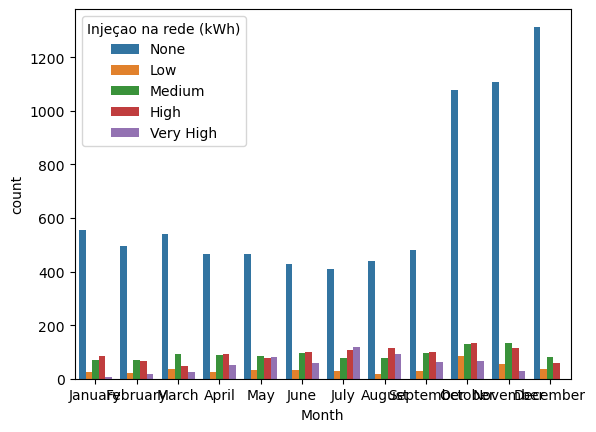

In [164]:
sns.countplot(x='Month', order=monthsL, hue='Injeçao na rede (kWh)', data=treino)
plt.show()

### Relation: 'Season' with 'Injeçao na rede (kWh)'

/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

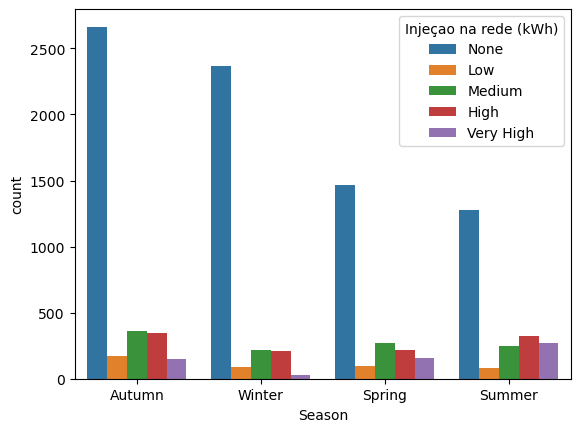

In [165]:
sns.countplot(x='Season', hue='Injeçao na rede (kWh)', data=treino)
plt.show()

### Relation: 'weather_description' with 'Injeçao na rede (kWh)'

/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/goncalo/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


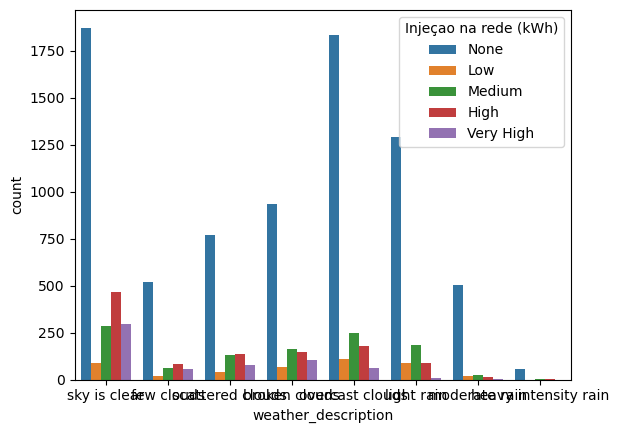

In [168]:
w_d_order = ['sky is clear', 'few clouds', 'scattered clouds', 'broken clouds', 'overcast clouds', 'light rain', 'moderate rain', 'heavy intensity rain']

sns.countplot(x='weather_description', order= w_d_order, hue='Injeçao na rede (kWh)', data=treino)
plt.show()

## Fase 4: Construção e avaliação de modelos ML